In [6]:
import pandas as pd
import numpy as np

In [7]:
#--------------------------------------------------MILESTONE 1--------------------------------------------------------------

In [8]:
#loading the prs dataset
df=pd.read_csv('prs_dataset.csv')

In [9]:
#check the description of the dataframe
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [10]:
#check the shape of the dataframe
print(df.shape)

(1101925, 16)


In [11]:
#check the dataframe information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [12]:
#check for null values in the dataframe
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [13]:
#replace all null values with 'NaN'
df.fillna("NaN", inplace=True)

In [14]:
#Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')


In [15]:
#Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')


In [16]:
#Sanity check - Check how many records are having order date greater than the delivery date
count=len(df[df['ORDER_CREATION_DATE']>df['REQUESTED_DELIVERY_DATE']])
print("Number of orders that have order date greater than delivery date are",count,"orders")

Number of orders that have order date greater than delivery date are 27142 orders


In [17]:
#Remove those records where order date is greater than the delivery date 
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]


In [18]:
#Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.
count = len(df[df['ORDER_AMOUNT'] == "-"])
print("Number of order amount with '-' in it are",count)

Number of order amount with '-' in it are 0


In [19]:
#Replace “-” with “” from the “ORDER_AMOUNT” field
df_copy = df.copy()
df_copy.loc[:, 'ORDER_AMOUNT'] = df_copy['ORDER_AMOUNT'].replace("-", "")
df=df_copy


In [20]:
#Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..
count = len(df[df['ORDER_AMOUNT'].str.contains(",")])
print("Number of order amounts with ',' in it are",count)

Number of order amounts with ',' in it are 1073406


In [21]:
#Replace “,” with “.” from the “ORDER_AMOUNT” field. 
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")


In [22]:
#Count the number of records where the order date and the delivery date are same
count = len(df[df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date])
print("Number of orders that have order date and delivery date same are",count)

Number of orders that have order date and delivery date same are 100437


In [23]:
#Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
currencies=df['ORDER_CURRENCY'].value_counts()
print(currencies)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [24]:
#Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.
conversion_rates = {
    'EUR': 1.1,
    'AUD': 0.76,
    'CAD': 0.81,
    'GBP': 1.3,
    'MYR': 0.24,
    'PLN': 0.26,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.08,
    'RON': 0.24,
    'SGD': 0.74,
    'CZK': 0.046,
    'HUF': 0.0034,
    'NZD': 0.71,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.32,
    'SEK': 0.11
}

df['amount_in_usd'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')  # Convert to numeric data type

# Convert non-USD currencies to USD using the conversion rates
df['amount_in_usd'] = df['amount_in_usd'].where(df['ORDER_CURRENCY'] == 'USD', df['amount_in_usd'] / df['ORDER_CURRENCY'].map(conversion_rates))


In [25]:
#Check for values “0” in the “'amount_in_usd” column.
count=len(df[df['amount_in_usd']==0])
print("Number of order amounts in USD that are 0 are:",count)


Number of order amounts in USD that are 0 are: 237654


In [26]:
#Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + '_' + df['COMPANY_CODE'].astype(str)


In [27]:
df


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,867.827273,12311807_3220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,715.781818,12311807_3220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,61357.690909,12118758_3260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1277.763636,1210499770_3290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,1210351400_3290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5966.472973,1210331804_4260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000,1210331804_4260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,1210331811_4260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,1210331811_4260


In [28]:
#--------------------------------------------------MILESTONE 2--------------------------------------------------------------


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

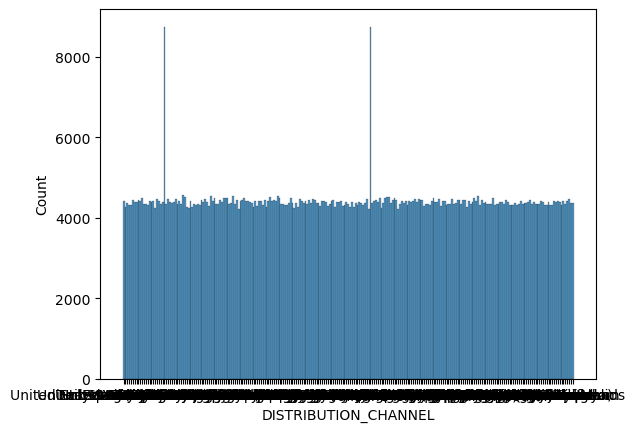

In [30]:
#Create a Histogram on DISTRIBUTION_CHANNEL
sns.histplot(data=df, x='DISTRIBUTION_CHANNEL')
plt.show()

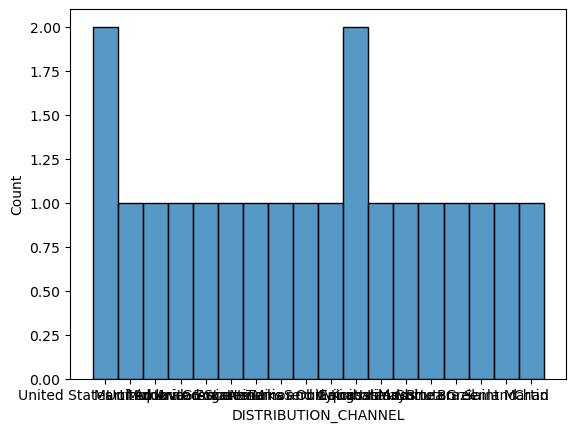

In [34]:
#Create a Histogram on DISTRIBUTION_CHANNEL (plotting for the first 20 data for better visualization )
sns.histplot(data=df.head(20),x='DISTRIBUTION_CHANNEL')
plt.show()

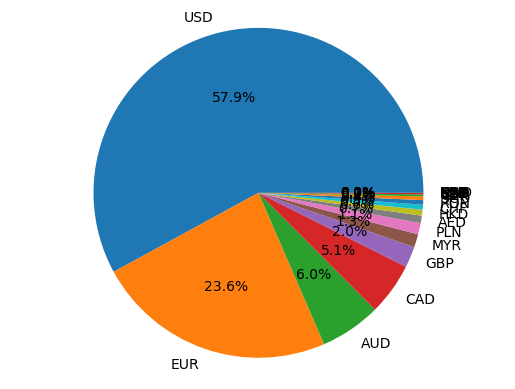

In [37]:
#Create a Pie Chart on ORDER_CURRENCY
currency_count=df['ORDER_CURRENCY'].value_counts()
plt.pie(currency_count,labels=currency_count.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

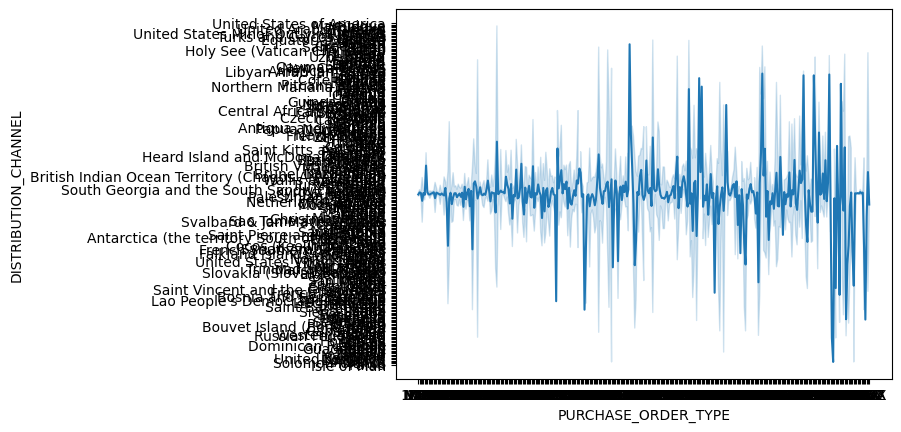

In [40]:
#Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
sns.lineplot(data=df,x='PURCHASE_ORDER_TYPE' , y='DISTRIBUTION_CHANNEL')
plt.show()

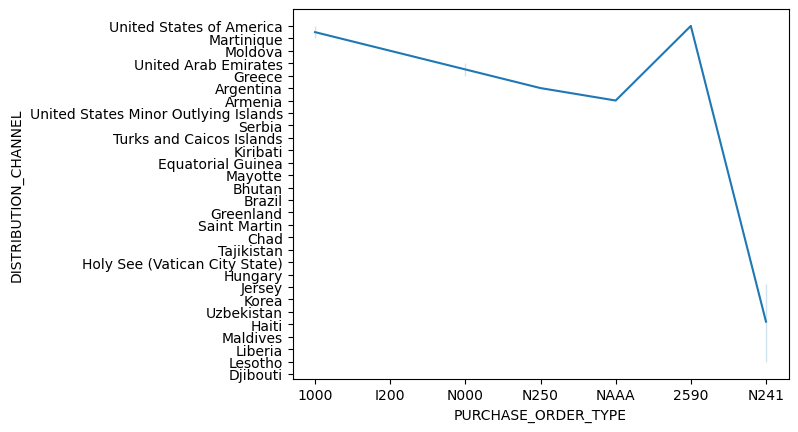

In [41]:
#Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL (with first 50 data for better visualization)
sns.lineplot(data=df.head(50),x='PURCHASE_ORDER_TYPE', y='DISTRIBUTION_CHANNEL')
plt.show()

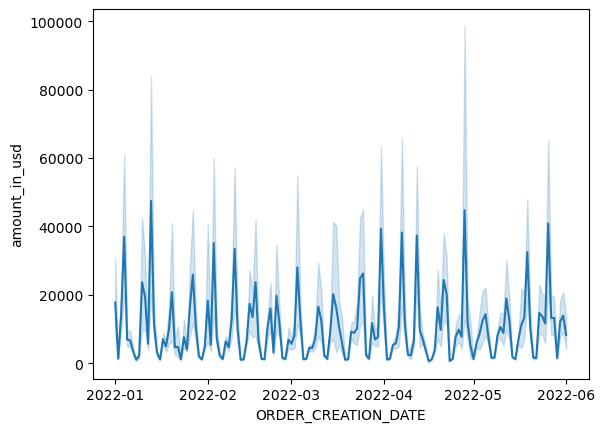

In [44]:
#Create a line plot on ORDER_CREATION_DATE and amount_in_usd
sns.lineplot(data=df,x='ORDER_CREATION_DATE',y='amount_in_usd')
plt.show()

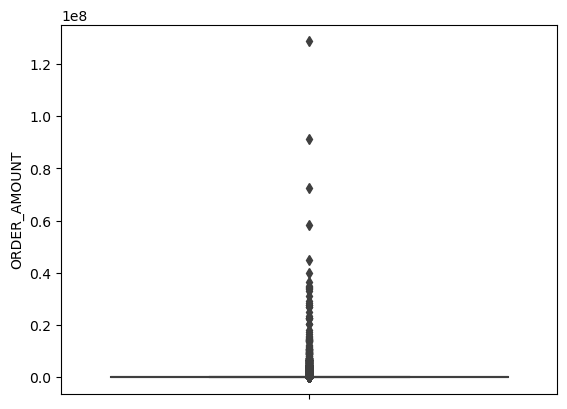

In [49]:
#Create a boxplot on ORDER_AMOUNT	to find out the outliers
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
sns.boxplot(data=df, y='ORDER_AMOUNT')
plt.show()

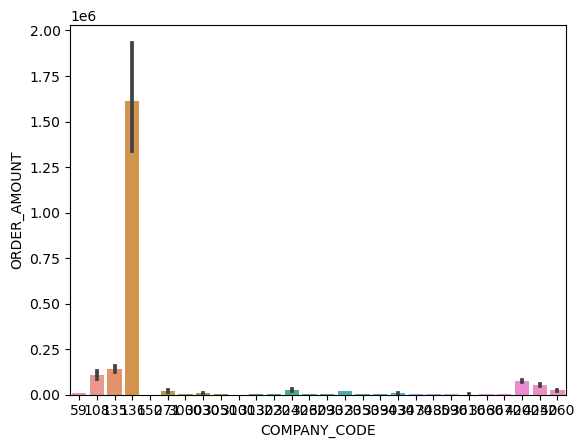

In [50]:
#Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT
sns.barplot(data=df,x='COMPANY_CODE' , y='ORDER_AMOUNT')
plt.show()

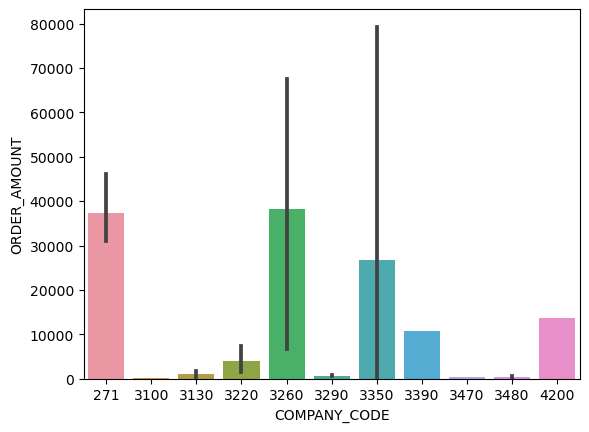

In [53]:
#Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT (with first 100 data for better visualization )
sns.barplot(data=df.head(100),x='COMPANY_CODE' , y='ORDER_AMOUNT')
plt.show()